# Similarity Metrics Calculation For Bug Detection Efficacy

## Similarity Metrics Demo

In [2]:
import Toolkits
import imp
# imp.reload(Toolkits)

In [55]:
# Following two distance/similarity metric rely on following install instruction
# After successful installation, DEP and SBERT similarity can be calculated properly. 
# After installation, cancel the comment below to calculate distance


from stanfordcorenlp import StanfordCoreNLP  # pip install stanfordcorenlp
from sentence_transformers import SentenceTransformer   # pip3 install -U sentence-transformers

"""
# For DEP distance, we need to parse grammar tree using Standfordcorenlp library.
# INSTALL BY FOLLWOING STEPS:
# 1) Download stanford-corenlp-4.0.0 from here: http://nlp.stanford.edu/software/stanford-corenlp-latest.zip
# 2) unzip
# 3) export CORENLP_HOME=/path/to/stanford-corenlp-4.0.0
# 4) Write /path/to/stanford-corenlp-4.0.0 below:
"""

# MODEL_DIR = r'/path/to/stanford-corenlp-4.0.0'
# nlp_en = StanfordCoreNLP(MODEL_DIR,lang="en")

# After calculation, close nlp_en model using:
# nlp_en.close() 


# For SBERT
model_en = SentenceTransformer('bert-base-nli-mean-tokens')

In [3]:
# This is a simple demo sentence

Source_sentence = "lines with a vowel or a lower-case letter before digits"
Translated_sentence = "lines with vowels or lowercase letters before numbers"
Source_Regex = "( ( [ <VOW> ] ) | ( [ <LOW> ] ) ) . *( [ <NUM> ] ) + . *"
Translated_Regex = "( ( [ <VOW> ] ) + | ( [ <LET> ] ) ) . * ( [ <NUM> ] ) + . *"

print("Calculating Similarity Metrics on \n  S1:'{}' and \n  S2:'{}'\n".format(Source_sentence, Translated_sentence))
print("-Levenshtein Similarity is {}".format(Toolkits.cal_levenshtein(Source_sentence, Translated_sentence)))
# print("-Dependency Distance is {}".format(Toolkits.cal_dependency_distance(nlp_en, Source_sentence, Translated_sentence)))
# print("-SBERT Similarity is {}".format(Toolkits.cal_semantic_sim(model_en, Source_sentence, Translated_sentence)[0]))
print("-BLEU Similarity is {}".format(Toolkits.cal_bleu(Source_sentence, Translated_sentence)))
print("-Regex Similarity is {}".format(Toolkits.cal_regex(Source_Regex, Translated_Regex)))
print("-DFA Similarity is {}".format(Toolkits.cal_dfa(Source_Regex, Translated_Regex)))
print("-HYB Similarity is {}".format(Toolkits.cal_hyb(Source_Regex, Translated_Regex)))

Calculating Similarity Metrics on 
  S1:'lines with a vowel or a lower-case letter before digits' and 
  S2:'lines with vowels or lowercase letters before numbers'

-Levenshtein Similarity is 0.7636363636363637
-BLEU Similarity is 0.6766810958271995
-Regex Similarity is 0.8888888888888888
-DFA Similarity is 0.4285714
-HYB Similarity is 0.6587301444444444


## Bug Detection Efficacy Against Threshold (Visualization)
For convenience, we already calculated the similarity values of different metrics and save them on [bug_detection_label.csv](../data/RQ1-RQ2-Bug-Detection/bug_detection_label.csv)

In [4]:
# load file, initiate variables
%matplotlib inline
import pandas as pd
import GetReports
import imp
import numpy as np
imp.reload(GetReports)
raw_data = pd.read_csv("../data/RQ1-RQ3-Bug-Detection/bug_detection_label.csv",encoding="utf-8")
print("read in: ", len(raw_data))

simis = ["LEVEN_Norm",
         "DEP_Norm",
         "SBERT_Norm",
         "BLEU_Norm",
         "REG_Norm",
         "DFA_Norm",
         "HYB_Norm"
        ]

read in:  500


### RQ1: Efficacy on bug detection accuracy/precision/recall/Fscores/sensitivity/Specificity

calculating on LEVEN_Norm
calculating on DEP_Norm
calculating on SBERT_Norm
calculating on BLEU_Norm
calculating on REG_Norm
calculating on DFA_Norm
calculating on HYB_Norm


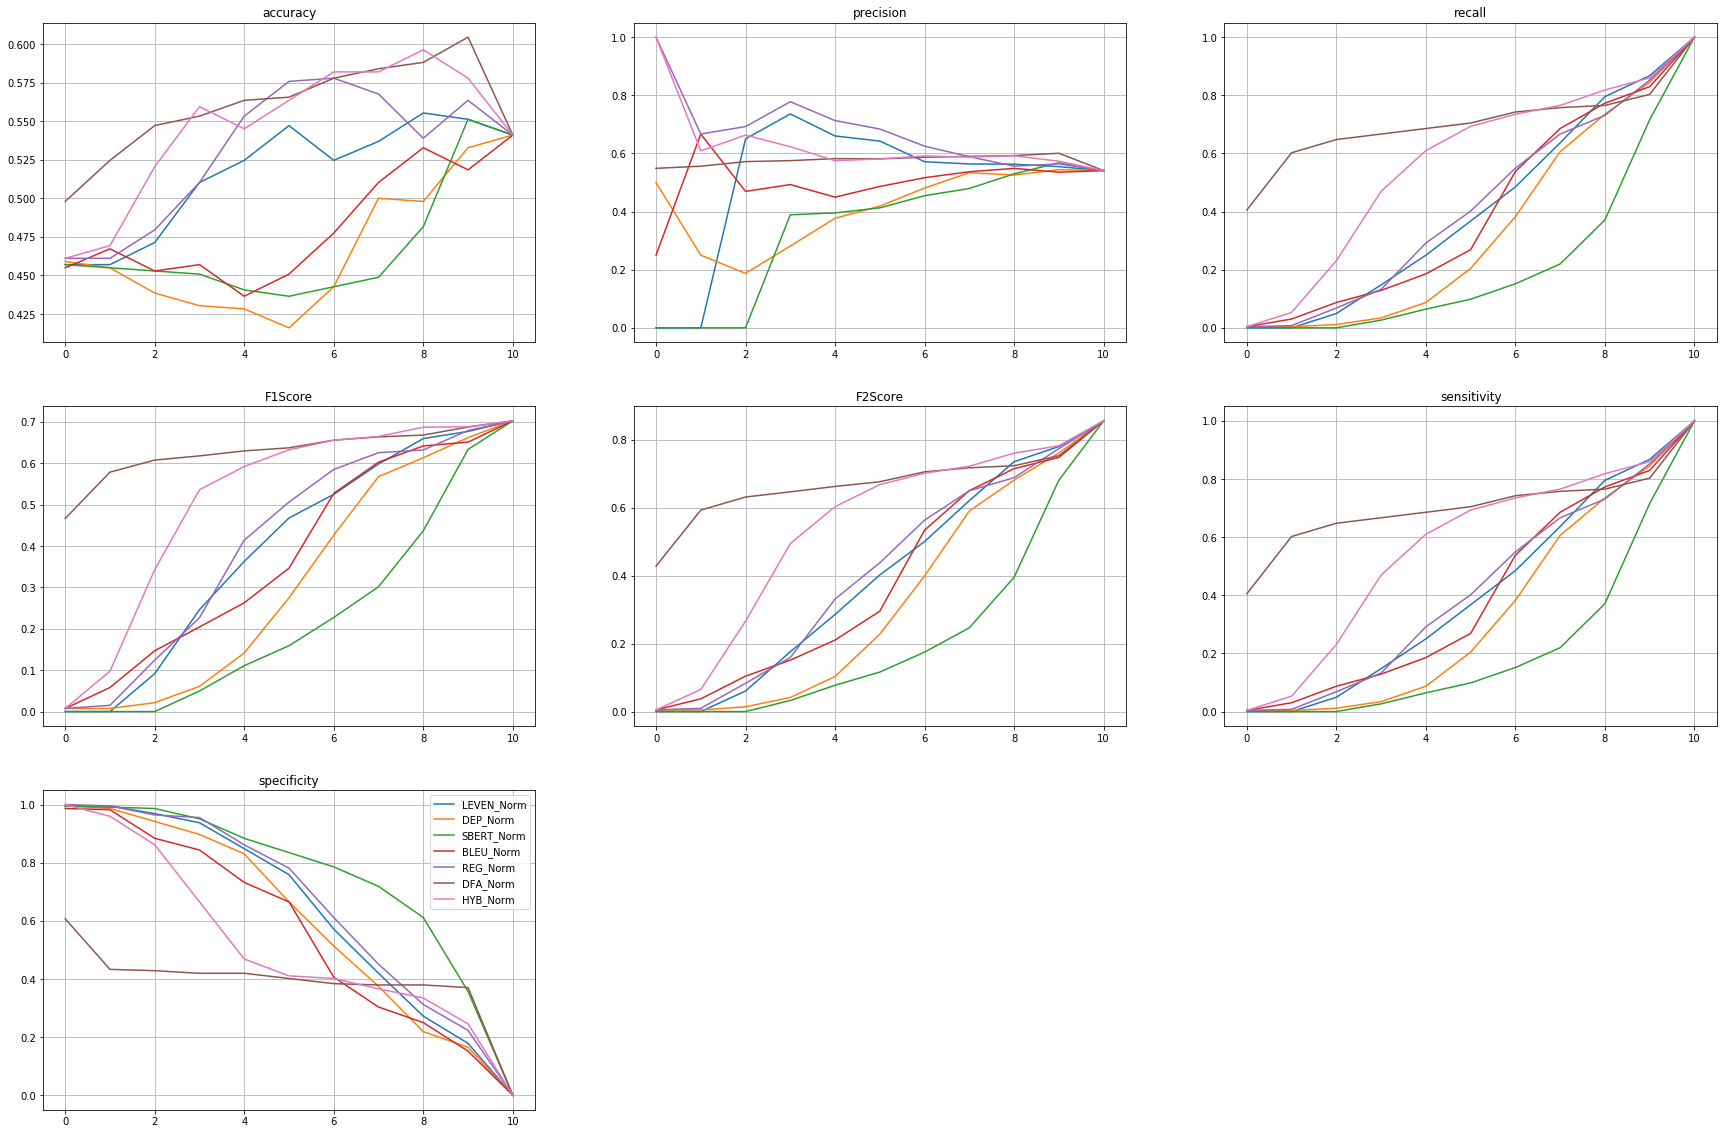

In [5]:
import DrawTools
import imp
threshold_list = np.arange(0.00, 1.01, 0.1)
all_report = GetReports.get_BugDetection_RQ1(simis, raw_data, threshold_list)
imp.reload(DrawTools)
DrawTools.draw_linechart_RQ1(all_report, simis)

### RQ3: Combination and Comparison of Similarity Metrics

In [6]:
import GetReports
imp.reload(GetReports)
threshold_list = np.arange(0.00, 1.01, 0.01)
all_report = GetReports.get_BugDetection_RQ1(simis, raw_data, threshold_list)
issues_dict = GetReports.get_issues_RQ3(all_report, simis, raw_data)

calculating on LEVEN_Norm
calculating on DEP_Norm
calculating on SBERT_Norm
calculating on BLEU_Norm
calculating on REG_Norm
calculating on DFA_Norm
calculating on HYB_Norm

[LEVEN_Norm]
best threshold: 0.5500, value: 17365

[DEP_Norm]
best threshold: 0.6900, value: 13440

[SBERT_Norm]
best threshold: 0.8700, value: 15308

[BLEU_Norm]
best threshold: 0.6400, value: 13446

[REG_Norm]
best threshold: 0.5900, value: 20850

[DFA_Norm]
best threshold: 0.9000, value: 17596

[HYB_Norm]
best threshold: 0.3000, value: 18476


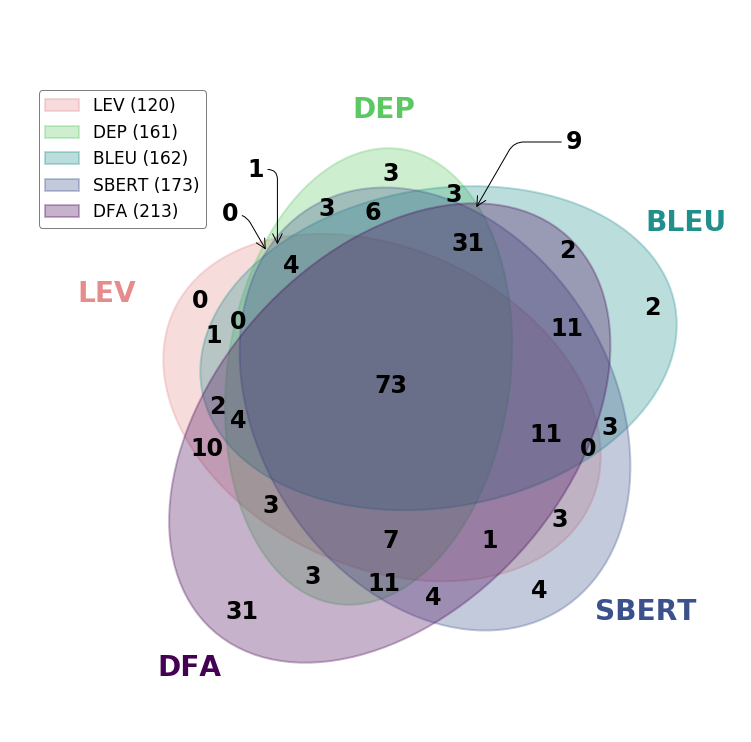

In [7]:
import imp
import DrawTools
import matplotlib
import matplotlib.pyplot as plt
imp.reload(DrawTools)
DrawTools.draw_venn_RQ3(issues_dict, "DFA") # it can be "DFA", "REG", and "HYB"